In [10]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.io as sio
from scipy import signal
from mpl_toolkits.mplot3d import Axes3D
# import ipympl

In [7]:
p5346C = np.load('p5346center.npz')['arr_0'].T
p5346S = np.load('p5346side.npz')['arr_0'].T

resolution = 11.758

In [8]:
# p5289S = p5289S[1:-2, 1:-2]
# p5289T = p5289T[1:-70, 1:-2]
# p5289S[np.isnan(p5289S)] = np.nanmean(p5289S); 
# p5289S = -1*np.flipud(p5289S)
# p5289T[np.isnan(p5289T)] = np.nanmean(p5289T); 

# p5289T = p5289T + -1*np.min(p5289T) 
# p5289S = p5289S + -1*np.min(p5289S)

p5346C = p5346C[1:-2, 1:-2]
p5346S = p5346S[1:-70, 1:-2]
p5346C[np.isnan(p5346C)] = np.nanmean(p5346C); 
p5346C = -np.flipud(p5346C)
# p5346C = -1*p5346C
p5346S[np.isnan(p5346S)] = np.nanmean(p5346S); 

p5346S = p5346S + -1*np.min(p5346S) 
p5346C = p5346C + -1*np.min(p5346C)

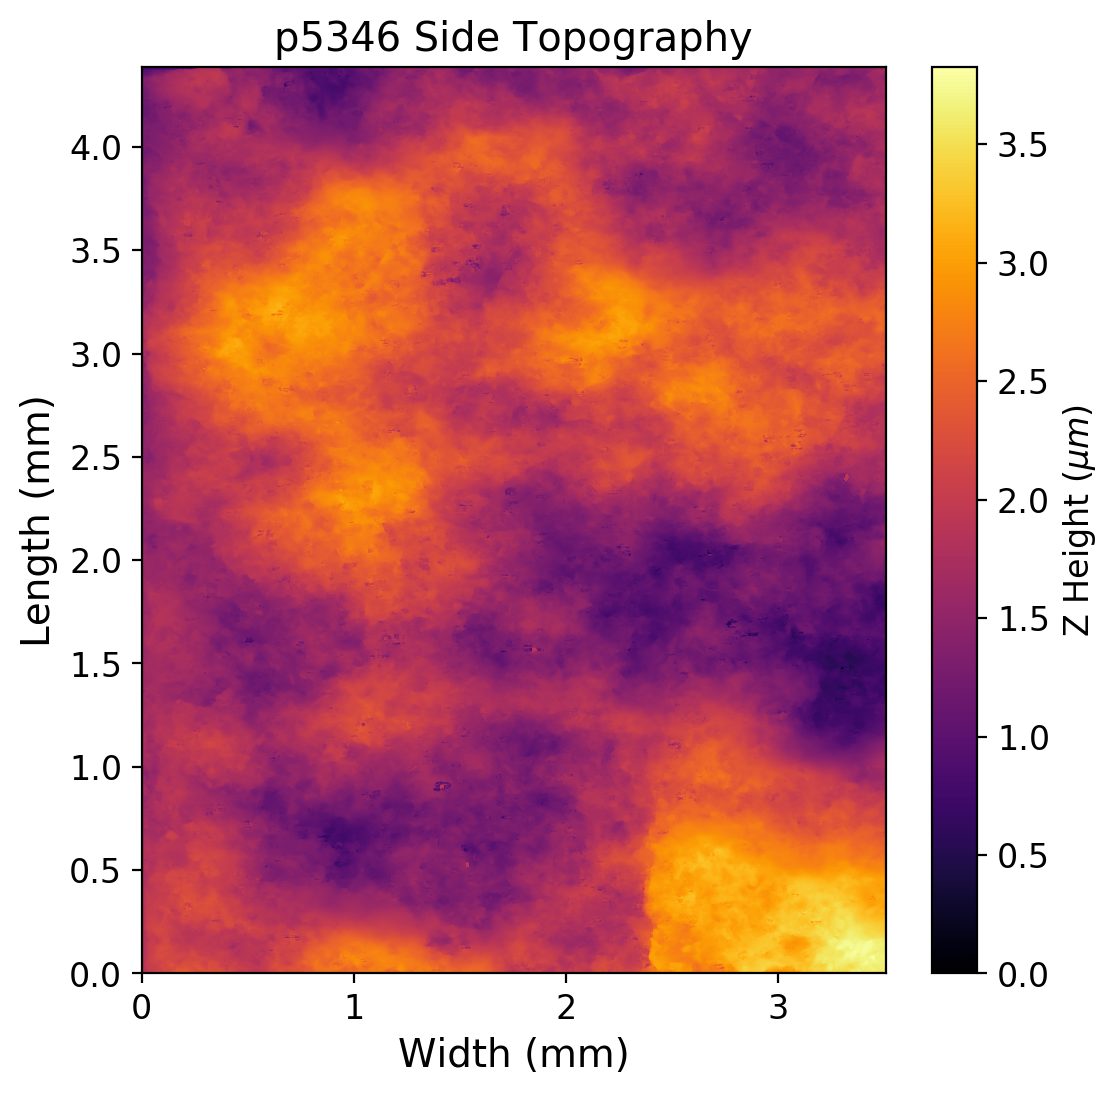

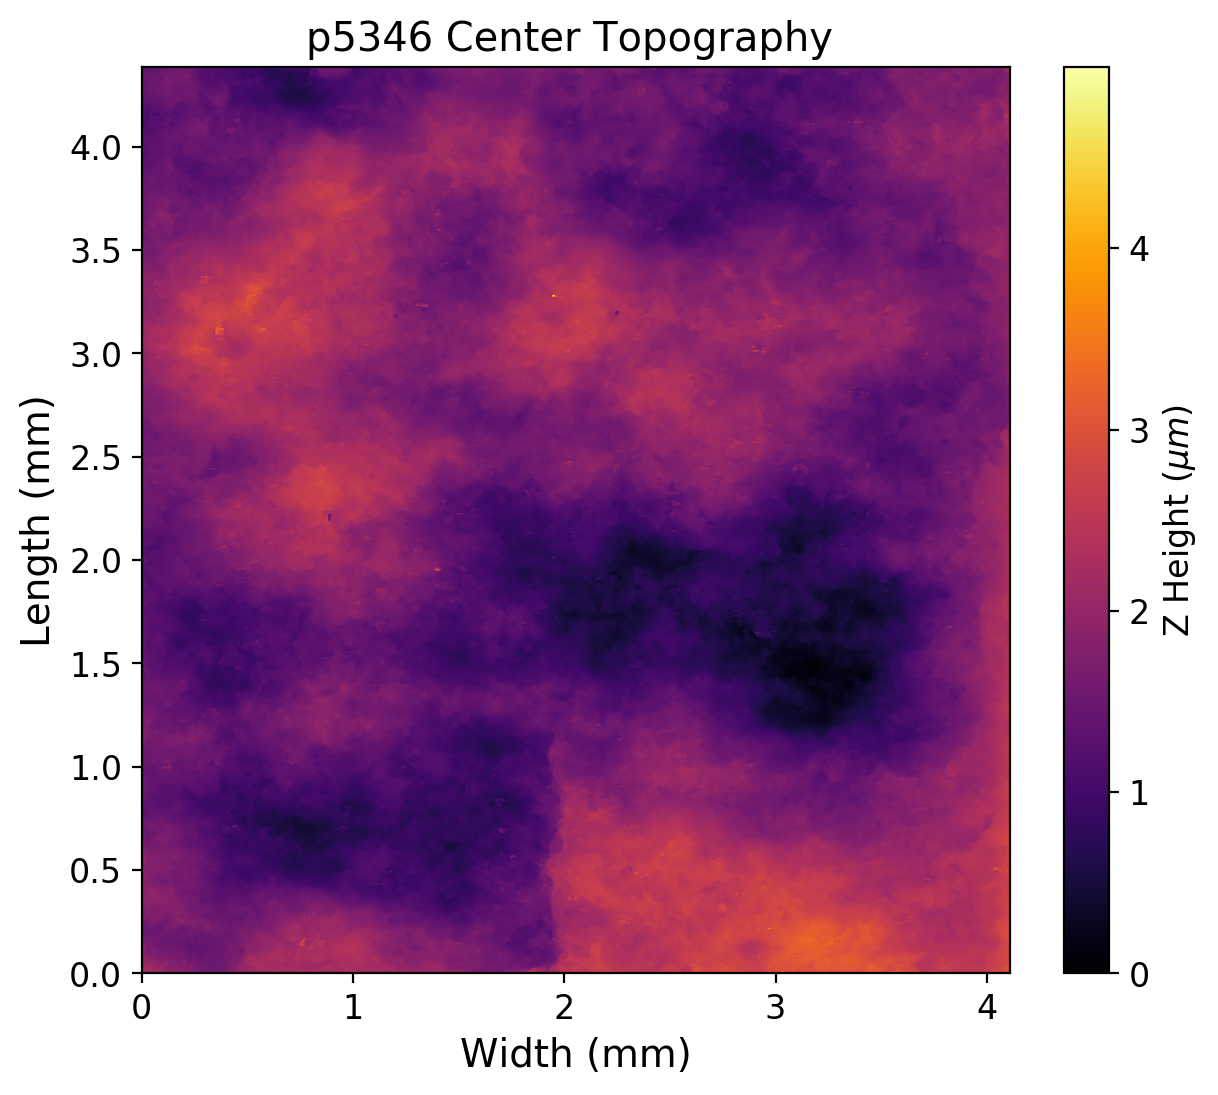

In [4]:
# fig = plt.figure(figsize=(6,6))#,dpi=300)
# ax = fig.add_subplot(111)
# ax.imshow(p5289T*resolution, cmap='plasma')
# plt.show()


# fig = plt.figure(figsize=(6,6))#,dpi=300)
# ax = fig.add_subplot(111)
# ax.imshow(p5289S*resolution, cmap='plasma')
# plt.show()

x = np.arange(0,p5346S.shape[1])*resolution / 1e4; 
y = np.arange(0,p5346S.shape[0])*resolution / 1e4; 
mpl.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(6,6),dpi=200)
ax = fig.add_subplot(111)
pos = ax.pcolormesh(y,x,np.flipud(p5346S.T), cmap='inferno')
fig.colorbar(pos,ax=ax,label='Z Height $(\mu m)$')
plt.ylabel('Length (mm)',size=14)
plt.xlabel('Width (mm)',size=14)
plt.title('p5346 Side Topography')
plt.show()
fig.savefig('p5346_side_Zheight.png')


x = np.arange(0,p5346C.shape[1])*resolution / 1e4; 
y = np.arange(0,p5346C.shape[0])*resolution / 1e4; 
mpl.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(7,6),dpi=200)
ax = fig.add_subplot(111)
pos = ax.pcolormesh(y,x,np.flipud(p5346C.T), cmap='inferno')
fig.colorbar(pos,ax=ax,label='Z Height $(\mu m)$')
plt.ylabel('Length (mm)',size=14)
plt.xlabel('Width (mm)',size=14)
plt.title('p5346 Center Topography ')
plt.show()
fig.savefig('p5346_center_Zheight.png')

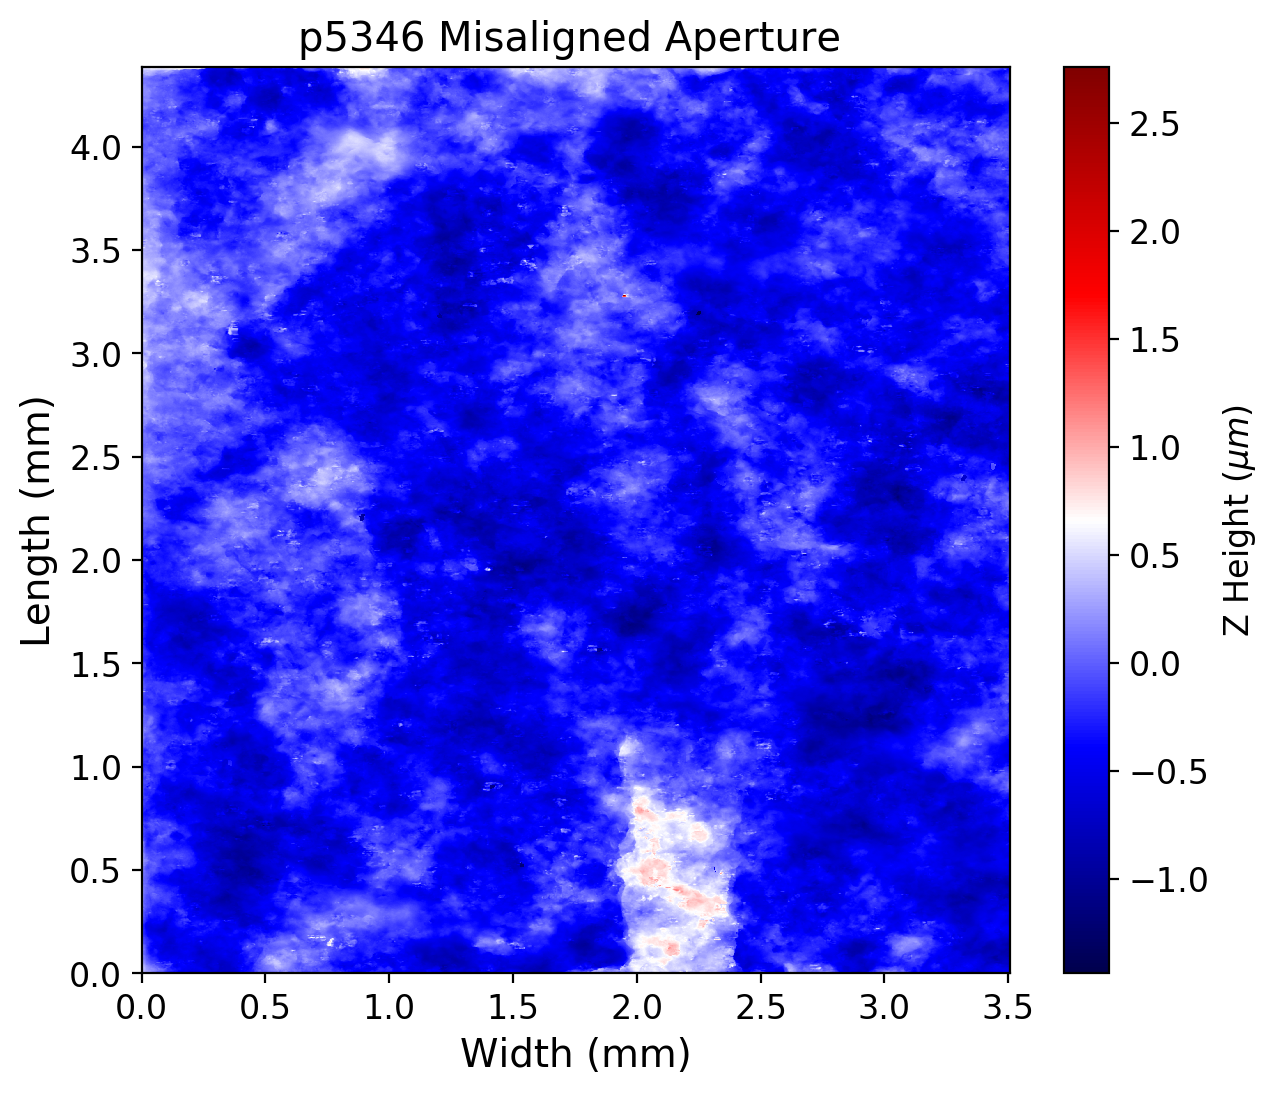

In [41]:
mis_align_ap = -1*p5346S[:,0:3729]+p5346C[0:2983,:];
x = np.arange(0,mis_align_ap.shape[1])*resolution / 1e4; 
y = np.arange(0,mis_align_ap.shape[0])*resolution / 1e4;

mpl.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(7,6),dpi=200)
ax = fig.add_subplot(111)
pos = ax.pcolormesh(y,x,np.flipud(mis_align_ap.T), cmap='seismic')
fig.colorbar(pos,ax=ax,label='Z Height $(\mu m)$')
plt.ylabel('Length (mm)',size=14)
plt.xlabel('Width (mm)',size=14)
plt.title('p5346 Misaligned Aperture ')
plt.show()
fig.savefig('p5346_misaligned_aperture.png')

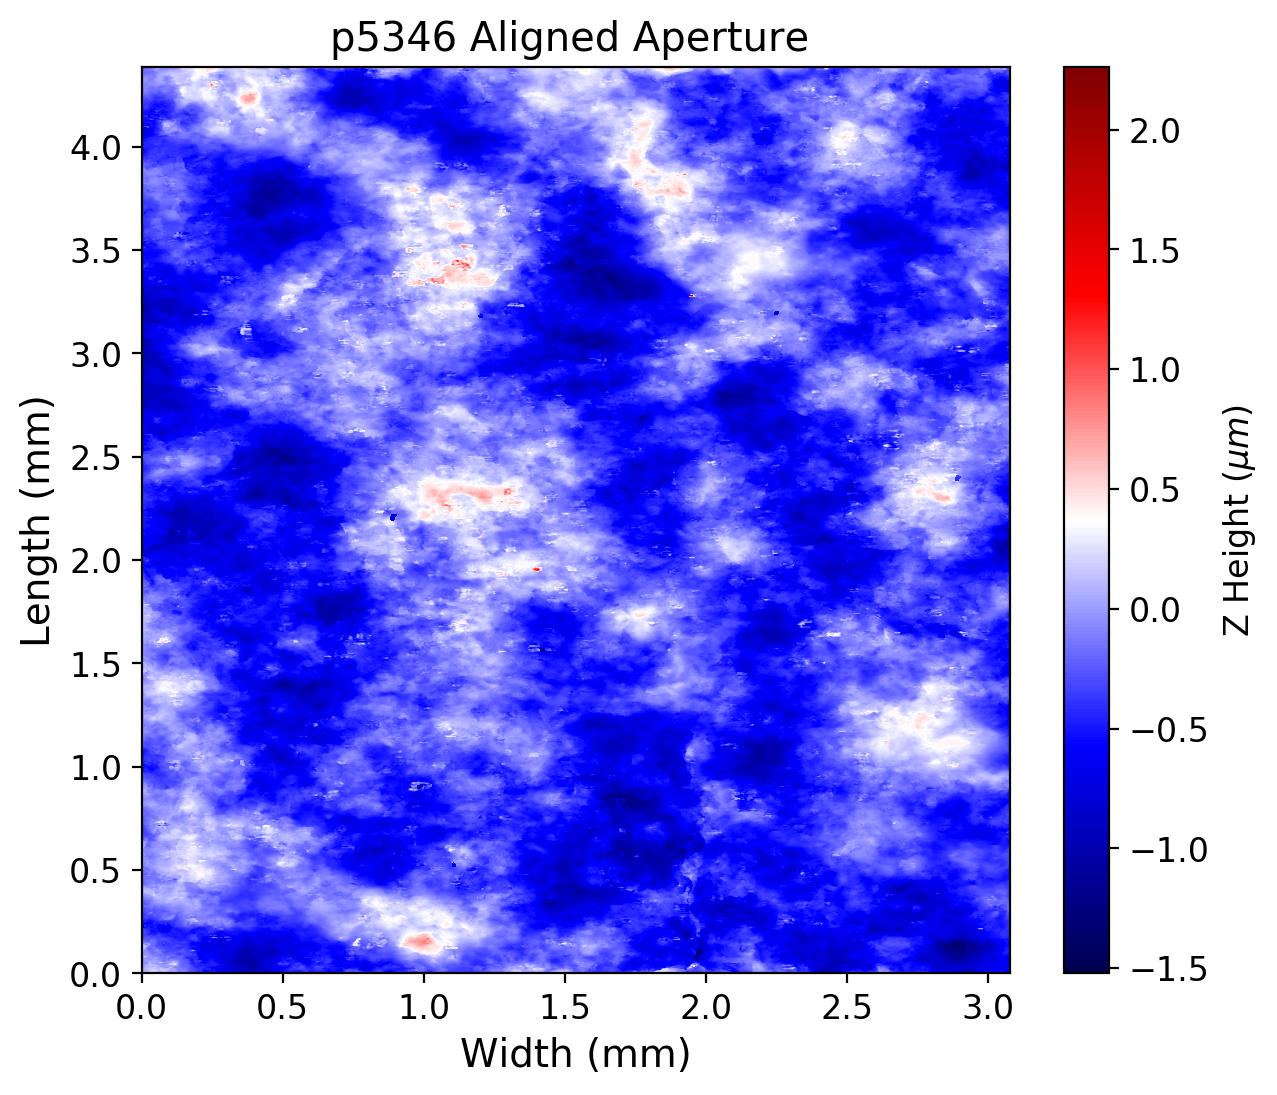

In [9]:
aperture = p5346C[0:2983-365,0:3729] - p5346S[365::,0:3729];
x = np.arange(0,aperture.shape[1])*resolution / 1e4; 
y = np.arange(0,aperture.shape[0])*resolution / 1e4;

mpl.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(7,6),dpi=200)
ax = fig.add_subplot(111)
pos = ax.pcolormesh(y,x,np.flipud(aperture.T), cmap='seismic')
fig.colorbar(pos,ax=ax,label='Z Height $(\mu m)$')
plt.ylabel('Length (mm)',size=14)
plt.xlabel('Width (mm)',size=14)
plt.title('p5346 Aligned Aperture ')
plt.show()
# fig.savefig('p5346_aligned_aperture.png')

In [13]:
sio.savemat('/home/clay/Documents/research/fracture_aperture/aperture.mat', {'aperture':aperture})
sio.savemat('/home/clay/Documents/research/fracture_aperture/p5346Center.mat', {'p5346C':p5346C[0:2983-365,0:3729]})
sio.savemat('/home/clay/Documents/research/fracture_aperture/p5346Side.mat', {'p5346S':p5346S[365::,0:3729]})

In [10]:
np.savetxt('/home/clay/Documents/research/fracture_aperture/aperture.csv', aperture, delimiter='\t')
np.savetxt('/home/clay/Documents/research/fracture_aperture/p5346Center.csv', p5346C[0:2983-365,0:3729], delimiter='\t')
np.savetxt('/home/clay/Documents/research/fracture_aperture/p5346Side.csv', p5346S[365::,0:3729], delimiter='\t')

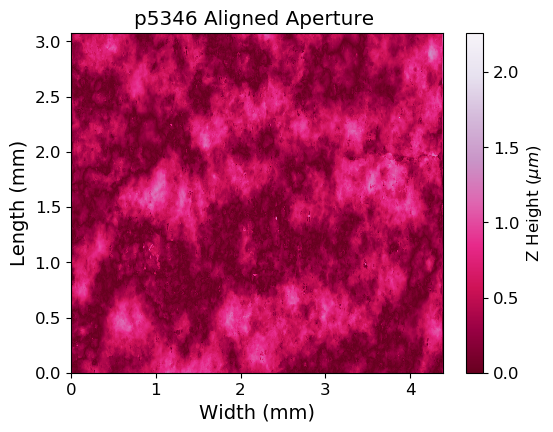

In [5]:
aperture2 = np.abs(aperture.copy())
# aperture2 = np.abs(aperture2)

mpl.rcParams.update({'font.size': 12})
cmap_reversed = mpl.cm.get_cmap('PuRd_r')
fig = plt.figure(figsize=(4.5,6),dpi=200)
ax = fig.add_subplot(111)
pos = ax.pcolormesh(y,x,np.flipud(aperture2), cmap=cmap_reversed)
fig.colorbar(pos,ax=ax,label='Z Height $(\mu m)$')
plt.ylabel('Length (mm)',size=14)
plt.xlabel('Width (mm)',size=14)
plt.title('p5346 Aligned Aperture ')
plt.show()

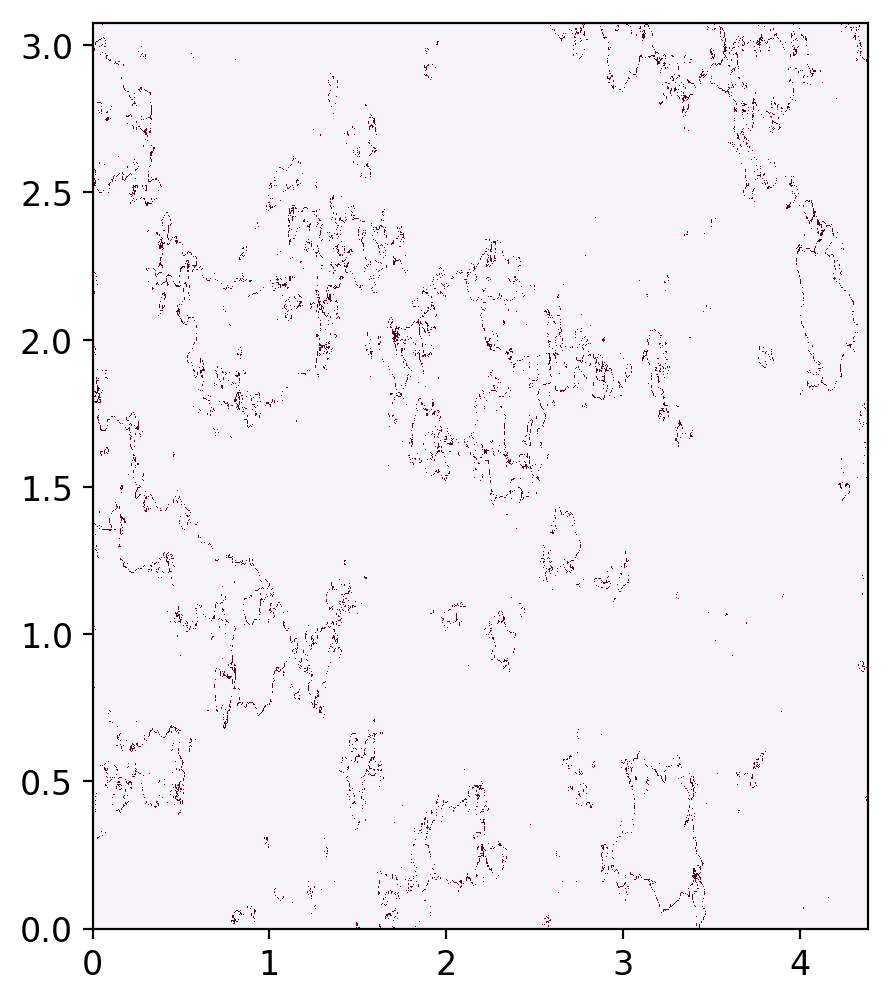

In [47]:
aperture3 = aperture2.copy()
aperture3[np.where(aperture3 > 1e-2)] = 1;
aperture3[np.where(aperture3 <= 1e-2)] = 0; 

cmap_reversed = mpl.cm.get_cmap('PuRd_r')
# fig = plt.figure(figsize=(6,4.5),dpi=300)
fig = plt.figure(figsize=(5,6),dpi=200)
ax = fig.add_subplot(111)
pos = ax.pcolormesh(x,y,np.flipud(aperture3), cmap=cmap_reversed)
# pos = ax.imshow(np.flipud(aperture3),cmap=cmap_reversed)
# fig.colorbar(pos,label='Aperture "openness" $(\mu m)$')

# plt.ylabel('Length (mm)',size=20)
# plt.xlabel('Width (mm)',size=20)
plt.show()
# fig.savefig('p5346_aligned_aperture_openness.png')

In [13]:
# # import ipympl
# # %matplotlib ipympl

# fig = plt.figure(figsize=(8,8))#,dpi=300)
# ax = fig.add_subplot(111, projection='3d')
# pos = ax.plot_surface(X, Y, aperture,cmap='PuRd')
# fig.colorbar(pos,ax=ax,label='Z Height $(\mu m)$')
# plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [8]:
# x.shape, y.shape, aperture.T.shape
# x = np.arange(0,aperture.shape[1])*resolution / 1e4; 
# y = np.arange(0,aperture.shape[0])*resolution / 1e4;
X, Y = np.meshgrid(np.linspace(0,1,aperture.shape[1]), np.linspace(0,1,aperture.shape[0]),sparse=False)
# X = X*resolution/1e4
# Y = Y**resolution/1e4

In [14]:
np.savez('/home/clay/Documents/research/fracture_aperture/p5346_aperture.npz', aperture)

In [ ]:
def transFindDown(aa):
    diff = p5289S[aa:2983+aa,:]-p5289T[:,0:3729]
    return aa,np.array(np.where(np.logical_and(diff >= -1e-2, diff <= 1e-2))).ravel().shape[0] / diff.ravel().shape[0]

def transFindLeft(aa):
    diff = np.pad(p5289S[0:2983,0:3729-aa], ((0,0),(0,aa)),'constant',constant_values=np.nan)-p5289T[:,0:3729]
    return aa,np.array(np.where(np.logical_and(diff >= -1e-1, diff <= 1e-1))).ravel().shape[0] / diff.ravel().shape[0]

def transFindRight(aa):
    diff = np.pad(p5289S[0:2983,0+aa:3729], ((0,0),(aa,0)),'constant',constant_values=np.nan)-p5289T[:,0:3729]
    return aa,np.array(np.where(np.logical_and(diff >= -1e-1, diff <= 1e-1))).ravel().shape[0] / diff.ravel().shape[0]

def transFindUp(aa):
    diff = np.pad(p5289S[0:2983-aa,0:3729], ((aa,0),(0,0)),'constant',constant_values=np.nan)-p5289T[:,0:3729]
    return aa,np.array(np.where(np.logical_and(diff >= -1e-1, diff <= 1e-1))).ravel().shape[0] / diff.ravel().shape[0]

In [ ]:
temp=[]; temp2=[]; temp3=[]; temp4=[]
for aa in range(0,200):
    temp.append(transFindDown(aa))
#     temp2.append(transFindLeft(aa))
#     temp3.append(transFindRight(aa))
#     temp4.append(transFindUp(aa))

In [ ]:
# [temp,temp2,temp3,temp4]
temp = np.array(temp)
temp.shape
# y, x = np.unravel_index(np.argmax(temp), temp.shape)
np.where(np.max(temp) == temp)

In [ ]:
x = np.arange(0,aperture.shape[1]); 
y = np.arange(0,aperture.shape[0]); 

# fig = plt.figure(figsize=(6,6))#,dpi=300)
# ax = fig.add_subplot(111)
# pos = ax.imshow(p5289S[0:2983,:]-p5289T[:,0:3729], cmap='plasma')
# fig.colorbar(pos)
# plt.show()

x = np.arange(0,aperture.shape[1]); 
y = np.arange(0,aperture.shape[0]); 
mpl.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(12,9),dpi=300)
ax = fig.add_subplot(111)
pos = ax.contourf(x*resolution/1e4,y*resolution/1e4,aperture, cmap='seismic')
fig.colorbar(pos,label='Aperture Height $(\mu m)$')

plt.ylabel('Length (mm)',size=20)
plt.xlabel('Width (mm)',size=20)
plt.show()
# fig.savefig('frac_aperture_contourf.png')

In [ ]:
# def addLoad(aperture,disp):
#     newAp = aperture.copy()
#     newAp[np.logical_or(newAp <= -5e-2, newAp >= 5e-2)] = -1*(-1*newAp[np.logical_or(newAp <= -5e-2, newAp >= 5e-2)] + disp)
#     return newAp

# # aperture = p5289S[0:2983-365,0:3729]-p5289T[365::,0:3729]
# aperture = p5346S[365::,0:3723]-p5346C[0:2841-365,:];

# aperture2 = addLoad(aperture,0.1); 
# aperture3 = addLoad(aperture,0.2)
# aperture4 = addLoad(aperture,0.5)
# aperture5 = addLoad(aperture,0.75)
# aperture6 = addLoad(aperture,1)
# aperture7 = addLoad(aperture,2)

In [ ]:
# x = np.arange(0,aperture.shape[1]); 
# y = np.arange(0,aperture.shape[0]); 

# fig = plt.figure(figsize=(12,9))#,dpi=300)
# ax = fig.add_subplot(111)
# cs = ax.contourf(x,y,aperture,cmap='PuRd')
# fig.colorbar(cs)
# plt.show()

# fig = plt.figure(figsize=(12,9))#,dpi=300)
# ax = fig.add_subplot(111)
# cs = ax.contourf(x,y,aperture2,cmap='PuRd',vmin=np.min(aperture),vmax=np.max(aperture))
# fig.colorbar(cs)
# plt.show()

# fig = plt.figure(figsize=(12,9))#,dpi=300)
# ax = fig.add_subplot(111)
# cs = ax.contourf(x,y,aperture3,cmap='PuRd',vmin=np.min(aperture),vmax=np.max(aperture))
# fig.colorbar(cs)
# plt.show()

# fig = plt.figure(figsize=(12,9))#,dpi=300)
# ax = fig.add_subplot(111)
# cs = ax.contourf(x,y,aperture4,cmap='PuRd',vmin=np.min(aperture),vmax=np.max(aperture))
# fig.colorbar(cs)
# plt.show()

# fig = plt.figure(figsize=(12,9))#,dpi=300)
# ax = fig.add_subplot(111)
# cs = ax.contourf(x,y,aperture5,cmap='PuRd',vmin=np.min(aperture),vmax=np.max(aperture))
# fig.colorbar(cs)
# plt.show()

# fig = plt.figure(figsize=(12,9))#,dpi=300)
# ax = fig.add_subplot(111)
# cs = ax.contourf(x,y,aperture6,cmap='PuRd',vmin=np.min(aperture),vmax=np.max(aperture))
# fig.colorbar(cs)
# plt.show()

# fig = plt.figure(figsize=(12,9))#,dpi=300)
# ax = fig.add_subplot(111)
# cs = ax.contourf(x,y,aperture7,cmap='PuRd',vmin=np.min(aperture),vmax=np.max(aperture))
# fig.colorbar(cs)
# plt.show()